# <center> <b> LECTURE 09 Logistic Regression & Model Evaluation
<span style="color: #f2cf4a; font-family: Babas; font-size: 2.1em;"> Content

    1. Logistic Regression
    2. Measures for Model Evaluation

Regression: dự đoán cho giá trị liên tục (giá nhà, giá ô tô, income,...)
Classification: dự đoán nhãn (comment của người dùng tích cực hay tiêu cực, đúng/sai, tốt/xấu, nhãn ABCD, hay tích cực tiêu cực

In [10]:
import warnings

warnings.simplefilter(action='ignore', category=FutureWarning)

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.preprocessing import PolynomialFeatures, OneHotEncoder
from sklearn.model_selection import train_test_split

In [13]:
sns.set_style('whitegrid')

In [14]:
%matplotlib inline

# 1. Logistic Regression (Logistic Classification)

<b>Logistic Regression</b> is one of the most simple and commonly used Machine Learning algorithms for two-class classification. It is easy to implement and can be used as the baseline for any binary classification problem.

Logistic Regression can be used for various classification problems such as spam detection, diabetes prediction, if a given customer will purchase a particular product or will they churn another competitor, whether the user will click on a given advertisement link or not, and many more examples are in the bucket.

## Types of Logistic Regression

- <b>Binary Logistic Regression</b>: The target variable has only two possible outcomes such as Spam or Not Spam, Cancer or No Cancer.
- <b>Multinomial Logistic Regression</b>: The target variable has three or more nominal categories such as predicting the type of Wine.
- <b>Ordinal Logistic Regression</b>: the target variable has three or more ordinal categories such as restaurant or product rating from 1 to 5.

#### Today we gonna use Titanic dataset to build a Logistic Regression.

Data Dictionary
- survival: Survival {0 = No, 1 = Yes}
- pclass: Ticket class {1 = 1st, 2 = 2nd, 3 = 3rd}
- sex: Sex
- Age: age in years
- sibsp: number of siblings / spouses aboard the Titanic
- parch: number of parents / children aboard the Titanic
- ticket: Ticket number
- fare: Passenger fare
- cabin: Cabin number
- embarked: Port of Embarkation {C = Cherbourg, Q = Queenstown, S = Southampton}

Variable Notes
- pclass: A proxy for socio-economic status (SES)
1st = Upper
2nd = Middle
3rd = Lower

- age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

- sibsp: The dataset defines family relations in this way...
Sibling = brother, sister, stepbrother, stepsister;
Spouse = husband, wife (mistresses and fiancés were ignored)

- parch: The dataset defines family relations in this way...
Parent = mother, father; Child = daughter, son, stepdaughter, stepson.
Some children travelled only with a nanny, therefore parch=0 for them.

In [18]:
titanic = pd.read_csv('titanic_train.csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## 1.1 Exploratory Data Analysis

### Check correlation value

In [22]:
titanic.corr(numeric_only=True) ## nhặt ra những cột quan trọng nhất nhiều thông tin nhất

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


### Check and handle missing values

In [13]:
titanic.isna().sum() ## 891 bản ghi và 12 cột => missing value thì phải xử lí

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

We can use heatmap to see where we are missing data

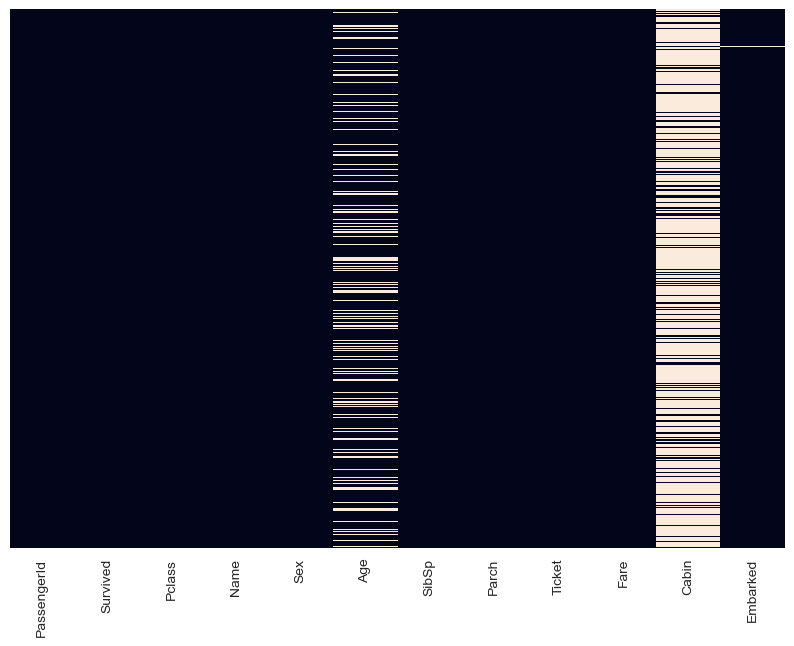

In [14]:
plt.figure(figsize=(10, 7))  # size 10 x 7
sns.heatmap(titanic.isna(), yticklabels=False, cbar=False)
plt.show() ## đoạn code này chả có tác dụng gì

Roughly 20% of the Age data is missing and 80% of the Cabin is missing. We'll probably drop this column or change it to something more useful.

### Number of survived

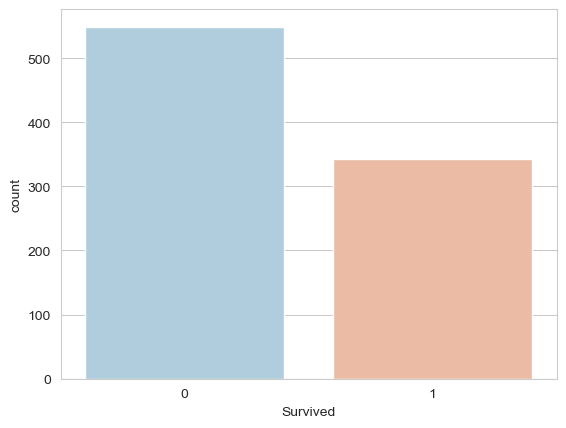

In [24]:
sns.countplot(x='Survived', data=titanic, palette='RdBu_r')
plt.show() ## tỷ lệ phân bố giữa các nhãn

In [ ]:
## 1 số bài toán kiểu gian lận hay ko gian lận fraud thì nhãn sẽ lệch rất lớn 
## --> bản ghi quá ít cho gian lận nên sẽ ko đủ để mô hình nhận định (60/40 ko sao nma 90/10 hoặc 98/2 thì có vấn đề)
## vì vậy đây sẽ là 1 trong những thứ cần phải check

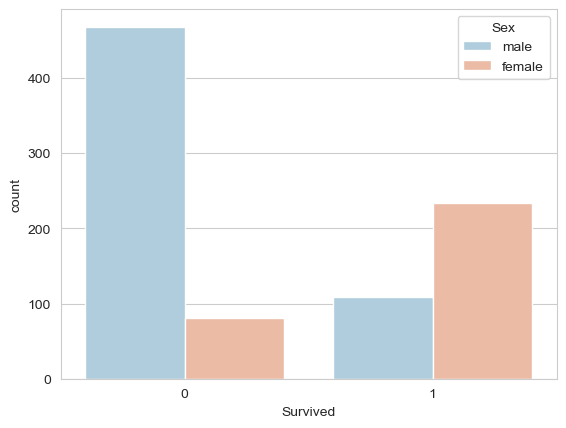

In [26]:
sns.countplot(x='Survived', hue='Sex', data=titanic, palette='RdBu_r') ## đếm bao nhiêu survive bằng 1 và thêm 1 chiều mới nữa là giới tính
plt.show()

### Distribution of Age

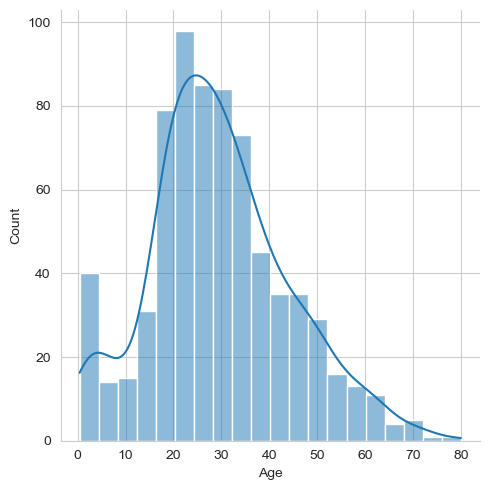

In [17]:
sns.displot(x='Age', data=titanic, kde=True)
plt.show()

This plot show that distribution of Age is long left tail so we cann't fill missing value by mean.

In [ ]:
## nếu nó là phân phối chuẩn thì có thể fill bằng mean được

### Parch vs SibSp

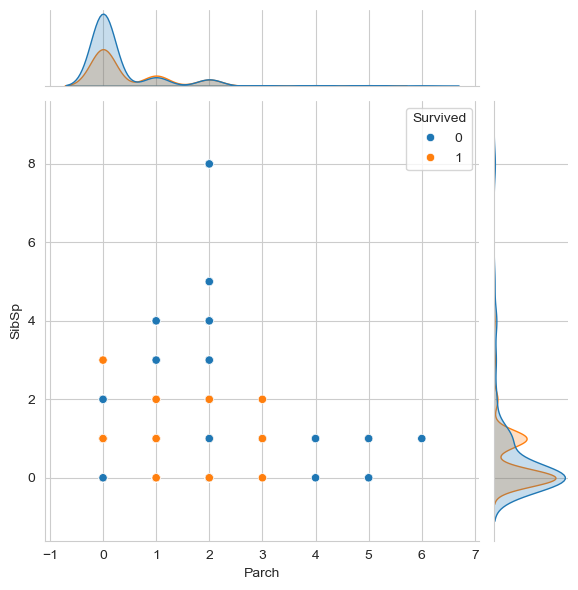

In [28]:
sns.jointplot(x='Parch', y='SibSp', hue='Survived', data=titanic)
plt.show() ## khó phân tích

We can merge 2 feature into only one feature named 'hasCompanion' to simplify problem.<br>
If Parch + SibSp > 1, hasCompanion = 1 else hasCompanion = 0 ---- có người đi cùng

### Check incorrect data types

In [57]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## 1.2 Data Wrangling

### Fill missing values
- Embarked by most frequent value
- Age by median

In [33]:
most_freq_embk = titanic['Embarked'].value_counts().idxmax() ## nhặt ra xem trong cột này nhãn nào nhiều nhất thì fill vào missing value -- bởi vì missing value ít chỉ có 2 và object
titanic['Embarked'].fillna(most_freq_embk, inplace=True)
titanic.shape

(891, 12)

In [35]:
titanic['Age'].fillna(titanic['Age'].median(), inplace=True) ## vì chuông này bị lệch nên fill bằng median, nếu mà phân phối chuẩn thì fill bằng mean

### Create 'hasCompanion' feature

Khách hàng có Parch + SibSp > 0 thì có hasCompanion = 1, ngược lại thì có hasCompanion = 0

In [37]:
# Cach 1
titanic['hasCompanion'] = np.where(titanic['Parch'] + titanic['SibSp'] > 0, 1, 0) ## trong thư viện numpy nếu true thì trả giá trị bằng 1, false thì trả bằng 0

In [39]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,hasCompanion
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


In [43]:
def convert_companion(value):
    if value > 0:
        return 1
    else:
        return 0

In [45]:
# Cach 2
new_titanic = titanic.copy()
new_titanic['hasCompanion'] = new_titanic['Parch'] + new_titanic['SibSp']
# apply hàm cal_companion cho đồng thời cả cột hasCompanion
new_titanic['hasCompanion'] = new_titanic['hasCompanion'].map(convert_companion) ## hoặc viết bằng for cũng được
new_titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,hasCompanion
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


In [ ]:
# Hoặc df.where(), ...

### Converting Categorical Features
- Sex
- Embarked

In [23]:
encoder = OneHotEncoder(drop='if_binary', sparse=False)

In [24]:
# Tạo cột mới từ Onehotencoder (giống get_dummiês trong pandsa)
encoder.fit_transform(titanic[['Sex', 'Embarked']]) ## lấy 2 cột trong pandas và ném vào fit transform

array([[1., 0., 0., 1.],
       [0., 1., 0., 0.],
       [0., 0., 0., 1.],
       ...,
       [0., 0., 0., 1.],
       [1., 1., 0., 0.],
       [1., 0., 1., 0.]])

In [64]:
# Get name of column after converting
encoder.get_feature_names_out(['Sex', 'Embarked'])

array(['Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S'], dtype=object)

In [25]:
# Tạo ra dataframe từ encoder với 2 cột categorical là Sex và Embarked
out = pd.DataFrame(encoder.fit_transform(titanic[['Sex', 'Embarked']]), 
                   columns=encoder.get_feature_names_out(['Sex', 'Embarked']))

In [26]:
out.head()

,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1.0,0.0,0.0,1.0
1,0.0,1.0,0.0,0.0
2,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,1.0
4,1.0,0.0,0.0,1.0


In [27]:
titanic = pd.concat([titanic, out], axis=1)

In [28]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,hasCompanion,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,1.0,0.0,0.0,1.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,0.0,1.0,0.0,0.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,0.0,0.0,0.0,1.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,0.0,0.0,0.0,1.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,1.0,0.0,0.0,1.0


### Drop column
- Cabin: too much missing values
- Ticker, Name, PassengerId: unique column
- Sex, Embarked, Parch, SibSp: not use

In [29]:
titanic.drop(['Embarked', 'Sex', 'Ticket', 'Name', 'PassengerId', 'Cabin', 'Parch', 'SibSp'], axis=1, inplace=True)

In [30]:
titanic.head()

,Survived,Pclass,Age,Fare,hasCompanion,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,7.2500,1,1.0,0.0,0.0,1.0
1,1,1,38.0,71.2833,1,0.0,1.0,0.0,0.0
2,1,3,26.0,7.9250,0,0.0,0.0,0.0,1.0
3,1,1,35.0,53.1000,1,0.0,0.0,0.0,1.0
4,0,3,35.0,8.0500,0,1.0,0.0,0.0,1.0


## 1.3 Build a Logistic Regression

In [31]:
X_titanic = titanic.drop('Survived', axis=1)
Y_titanic = titanic['Survived']

In [32]:
lr_1 = LogisticRegression()

In [33]:
lr_1.fit(X_titanic, Y_titanic)

LogisticRegression()

In [54]:
lr_1.intercept_

array([3.56143406])

In [55]:
lr_1.coef_

array([[-1.08903094e+00, -3.11278379e-02,  5.20607149e-04,
        -3.42295474e-02, -2.48195036e+00,  1.17326736e+00,
         1.16956492e+00,  6.96807884e-01]])

In [78]:
lr_1.predict(X_titanic)

array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1,

# 2. Measures for Model Evaluation

In [ ]:
## càng gần 0 càng tốt
## phải search xem là mô hình nào dùng cái nào mse, mae

## 2.1 Regression Problem

<p>When evaluating our models, not only do we want to visualize the results, but we also want a quantitative measure to determine how accurate the model is.</p>

<p>There are so many measures/metrics that are often used to determine the performance of a regression model are:</p>
    <ul>
        <li><b>Mean Squared Error (MSE)</b></li>
        <li><b>Mean Absolute Error (MAE)</b></li>
        <li><b>Root Mean Squared Error (RMSE)</b></li>
        <li><b>R^2 / R-squared</b></li>
    </ul>

<b>1. Mean Squared Error (MSE)</b>

<p>The Mean Squared Error measure the average of the squares of errors, that is, the difference between actual value (y) and the estimated value (ŷ).</p>

Format: $$ MSE = \frac{1}{n} \Sigma_{i=1}^{n}(y_i - \hat{y}_i)^2 $$
    
<b>2. Mean Absolute Error (MAE)</b>
<p>The Mean Absolute Error computes mean absolute error, a risk metric corresponding to the expected value of the absolute error loss .</p>

Format: $$ MAE = \frac{1}{n} \Sigma_{i=1}^{n}|y_i - \hat{y}_i|$$

<b>3. Root Mean Squared Error (RMSE)</b>
<p>Root Mean Squared Error is the square root of the average of squared errors.</p>

Format: $$ RMSE = \sqrt{MSE} =  \sqrt{\frac{1}{n} \Sigma_{i=1}^{n}(y_i - \hat{y}_i)^2}$$

<b>4. R-squared</b>
<p>R squared, also known as the coefficient of determination, is a measure to indicate how close the data is to the fitted regression line.</p>

Format: $$R^2 = 1 - \frac{\Sigma_{1}^{n}(y_i - \hat{y}_i)^2}{\Sigma_{1}^{n}(y_i - \bar{y})^2}$$

Docs from scikit-learn: https://scikit-learn.org/stable/modules/model_evaluation.html

In [79]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [82]:
car = pd.read_csv('cleaned_data.csv')
car.head()

,symboling,normalized-losses,make,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,...,city-mpg,highway-mpg,price,city-L/100km,highway-L/100km,horsepower-binned,fuel-type-diesel,fuel-type-gas,aspiration-std,aspiration-turbo
0,3,122,alfa-romero,two,convertible,rwd,front,88.6,0.811148,0.890278,...,21,27,13495.0,11.190476,8.703704,Low,0,1,1,0
1,3,122,alfa-romero,two,convertible,rwd,front,88.6,0.811148,0.890278,...,21,27,16500.0,11.190476,8.703704,Low,0,1,1,0
2,1,122,alfa-romero,two,hatchback,rwd,front,94.5,0.822681,0.909722,...,19,26,16500.0,12.368421,9.038462,Medium,0,1,1,0
3,2,164,audi,four,sedan,fwd,front,99.8,0.848630,0.919444,...,24,30,13950.0,9.791667,7.833333,Low,0,1,1,0
4,2,164,audi,four,sedan,4wd,front,99.4,0.848630,0.922222,...,18,22,17450.0,13.055556,10.681818,Low,0,1,1,0


In [84]:
Y = car['price']

### Model 1: Simple Linear Regression (price ~ horsepower)

In [86]:
X_horsepower = car[['horsepower']]

#### Train model

In [87]:
lm1 = LinearRegression()
lm1.fit(X_horsepower, Y)

LinearRegression()

#### Predict

In [88]:
y_hat_model1 = lm1.predict(X_horsepower)

#### Calculate metrics

In [91]:
print('The mean square error of price and predicted value is: ', mean_squared_error(Y, y_hat_model1))
print('The mean absolute error of price and predicted value is: ', mean_absolute_error(Y, y_hat_model1))
print('The r squared of price and predicted value is: ', r2_score(Y, y_hat_model1))

The mean square error of price and predicted value is:  21651264.45659664
The mean absolute error of price and predicted value is:  3329.0727119498415
The r squared of price and predicted value is:  0.6554631732894476


### Model 2: Multiple Linear Regression (price ~ all features)

In [ ]:
numerical_cols = car.describe(exclude='object').columns

In [ ]:
X_all = car[numerical_cols].drop('price', axis=1)
Y = df['price']
all_features_model = LinearRegression()
all_features_model.fit(X_all, Y)
Y_hat_at = all_features_model,predict(X_all)

In [ ]:
# all numerical features ~ price

print('The mean square error of price and predicted value is: ', mean_squared_error(Y, y_hat_model1))
print('The mean absolute error of price and predicted value is: ', mean_absolute_error(Y, y_hat_model1))
print('The r squared of price and predicted value is: ', r2_score(Y, y_hat_model1))

<div class="alert alert-info" style="margin-top: 20px">
    <h1>Exercise </h1>
    <p>Train a linear model using all features</p>
</div>

In [ ]:
# Start here


<div class="alert alert-info" style="margin-top: 20px">
    <h1>Exercise </h1>
    <p>Calculate MSE, MAE and R^2 after training</p>
</div>

In [ ]:
# Start here


### Model 3: Polynomial Regression (price ~ all features)

<div class="alert alert-info" style="margin-top: 20px">
    <h1>Exercise </h1>
    <p>Train a polynomial model (degree = 2) using all features then calculate 3 metrics (MAE, MSE, R2)</p>
</div>

In [ ]:
# Start here


### Decision Making: Determining a Good Model Fit

<p>Now that we have visualized the different models, and generated the R-squared,MSE & MAE values for the fits, how do we determine a good model fit?
<ul>
    <li><i>What is a good R-squared value?</i></li>
</ul>
</p>

<p>When comparing models, <b>the model with the higher R-squared value is a better fit</b> for the data.
<ul>
    <li><i>What is a good MSE, MAE?</i></li>
</ul>
</p>

<p>When comparing models, <b>the model with the smallest MSE, MAE value is a better fit</b> for the data.</p>

### Conclusion
<p>Comparing these three models, we conclude that ____ is the best model to be able to predict price from our dataset.

## 2.2 Classification Problem

**1. Confusion matrix** is a table that is used to evaluate the performance of a classification model. The fundamental of a confusion matrix is the number of correct and incorrect predictions are summed up class-wise.

|                      | Predicted: True | Predicted: False |
|----------------------|------|-------|
| <b>Actual: True</b>  | 100  | 2     |
| <b>Actual: False</b> | 10   | 78    |

- 100 is called True Positive (correct result)
- 78 is value of True Negative (correct result)
- 10 is value of False Positive (missing result)
- 2 is called False Negative (unexpected result)

**2. Accuracy** is how close a given set of observations are to their true value or probability that model predict true
Format: $$ accu = \frac{1}{n} \Sigma_{1}^{n}(\hat{y}_i = y_i) $$
Or you can calculate from confusion matrix: $$accu = \frac{TP+TN}{\text{number of samples}}$$

**3. Precision** is the ability of the classifier not to label as positive a sample that is negative.
Format: $$precision = \frac{TP}{TP+FP}$$

**4. Recall** is the ability of the classifier to find all the positive samples.
Format: $$recall = \frac{TP}{TP+FN}$$

In [ ]:
true = [1,1,1,1,0,0,1,0,0,1]
pred = [1,0,0,0,1,1,0,1,1,1]

In [37]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score

In [ ]:
neu du lieu bi lech
1,1,1,1,1,1,1,1,1,0 actual
1,1,1,,1,1,1,1,1,1,1 pre
=> co the actual tot vi du doan dung gan het nhung that ra lai la mo hinh te vi gia tri 0 quan trong nhat thi du doan sai

In [ ]:
precision: trong tat ca nhung quan sat ban du bao la true thi co bao nhieu cai thuc su la true
precision voi recall la trade off 1 cai giam thi 1 cai tang

### Model 1: Logistic Regression (survived ~ chosen features in 1)

In [38]:
lr_1 = LogisticRegression()
lr_1.fit(X_titanic, Y_titanic)

LogisticRegression()

In [39]:
y_pred_titanic = lr_1.predict(X_titanic)

In [40]:
accuracy_score(Y_titanic, y_pred_titanic)

0.7912457912457912

In [41]:
precision_score(Y_titanic, y_pred_titanic)

0.7378048780487805

In [42]:
recall_score(Y_titanic, y_pred_titanic)

0.7076023391812866

### Model 2: Logistic Regression (survived ~ all features)
Encode:
- Sex, Embarked, Parch, SibSp

Drop:
- Cabin: too much missing values
- Ticker, Name, PassengerId: unique column

In [ ]:
# Drop 4 columns

# Encode Sex, Embarked, Parch, SibSp


In [ ]:
lr_2 = LogisticRegression()
...

## Which one is better ?

In [ ]:
...

## 2.3. Out-of-Sample measures

In the process of model evaluation, our focus extends beyond the data currently available to us and encompasses unseen data. The intention is to ensure that the deployed model doesn't merely excel on existing data but is also effective on data it hasn't encountered before. How do we achieve this evaluation on unseen data?

One straightforward approach involves making the assumption that the unseen data, or future data, is drawn from the same population as the existing data. With this assumption in mind, we employ a simple technique. The historical data is systematically divided by a fixed ratio into two distinct datasets: <b>a training set & a testing set</b>. Subsequently, we build the model using only the training set, and its performance is then rigorously assessed using the testing set.

#### Split by 80/20

In [116]:
X_train, X_test, y_train, y_test = train_test_split(X_titanic, Y_titanic, test_size=0.2, random_state=2)

#### Train & evaluate logistic regression 1

In [ ]:
lr_1.fit()
...

#### Train & evaluate logistic regression 2

In [ ]:
lr_2.fit()
...

### Which one is better on testing set ?

# Extra: how does the logistic regression find the "best" boundary ?

#### Cần cài đặt conda install -c conda-forge ffmpeg trước khi chạy đoạn code ở dưới

In [43]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

In [44]:
%matplotlib notebook

# Generate 2D data
X, y = make_classification(
    n_samples=450, 
    n_features=2, 
    n_classes=2, 
    n_clusters_per_class=1, 
    n_redundant=0, 
    random_state=42)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create logistic regression model, 
# We don't use LogisticRegression in this example because of lacking of partial_fit()
# SGDClassifier is a collection of classifiers trained with Stoschastic Gradient Descent method
clf = SGDClassifier(loss='log_loss', random_state=42)

# Set up the plot
fig, ax = plt.subplots(figsize=(8, 6))
xx, yy = np.meshgrid(np.linspace(X[:, 0].min(), X[:, 0].max(), 100),
                     np.linspace(X[:, 1].min(), X[:, 1].max(), 100))

# Function to update the plot for each animation frame
def update(frame):
    clf.partial_fit(X_train, y_train, classes=np.unique(y))
    Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    ax.clear()
    ax.contour(xx, yy, Z, levels=[0], linewidths=2, colors='black', linestyles='dashed')
    ax.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.Paired)
    ax.set_title(f"Iteration {frame + 1}")
    ax.set_xlabel("Feature 1")
    ax.set_ylabel("Feature 2")

<IPython.core.display.Javascript object>

In [45]:
# Generate animation
anim = FuncAnimation(fig, update, frames=120, interval=100, repeat=False, blit=True)
HTML(anim.to_html5_video())

Thuật toán Linear Regression có closed-equation (công thức đầy đủ để tìm ra bộ hệ số từ X & y). Với Logistic Regression hay rất nhiều các algo phức tạp, chúng ta không thể tìm được công thức nghiệm một cách chính xác. Hướng tiếp cận của các thuật toán này thường dựa trên các iterative method, một trong số đó là Gradient Descent.

Ý tưởng:
- khởi tạo ban đầu ngẫu nhiên bộ hệ số (intercept, slope)
- tìm ra "hướng" để tiến tới bộ hệ số tối ưu
- dịch chuyển theo "hướng đó" và tìm ra bộ hệ số mới
- lặp lại b2 và b3 cho đến khi tìm ra bộ hệ số "tốt nhất" trong một giới hạn nào đó

Trong đoạn animation trên, các bạn có thể thấy đường boundary ở iteration = 1 rất tệ, sau đó trải qua mỗi vòng lặp "học" mô hình sẽ dần tốt hơn. Đến một ngưỡng số lần lặp nào đó thì mô hình không còn cải thiện thêm được nữa. Đó là mô hình với bộ hệ số tốt nhất với các config hiện tại.

# END